## Strategy planing
Two approaches to detect ads using machine learning
1. Classifying images
2. Classifying texts 

### 1. Classifying Images
1. Download images from google using selenium (around 700 ad images and 620 non-ad images)
2. Building models - logistic regression, sequential models, resnet50, Xception.
3. Saving the model with best accuracy using model.save()
4. Using the best model to classify the images.

### 2. Classifying texts 
1. Downloaded amazon text ads data from kaggle
2. Download simple texts such as texts, etc. from kaggle 
3. Generate Tf-Idf scores
3. Using topic modeling and/or clustering generate topics 
3. Classify using some algorithm, still to be thought of....

### Building the application
Application will be built using streamlit. 
It will have two side menus, one for image classification and other will be for text classification.

In [ ]:
!pip install tqdm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import os
import glob
from tqdm import tqdm

In [ ]:
from tensorflow.keras.utils import to_categorical
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
cd ./drive/MyDrive/Detecting ads using machine learning/Photo Data

/content/drive/MyDrive/Detecting ads using machine learning/Photo Data


In [ ]:
ls

 AccVal_acc.png   adsclassifymodel.sav   model_vgg19.h5   test/
 ads/             LossVal_loss.png      'non ads'/        train/


In [ ]:
# import os
# import numpy as np
# import shutil
# import random

# rootdir= '/content/drive/MyDrive/Detecting ads using machine learning/Photo Data' # data root path

# classes = ['ads', 'non ads'] #total labels

# for i in tqdm(classes):
#   os.makedirs(rootdir +'/train/' + i)
#   os.makedirs(rootdir +'/test/' + i)

#   source = rootdir + '/' + i

#   allFileNames = os.listdir(source)

#   np.random.shuffle(allFileNames)

#   test_ratio = 0.25

#   train_FileNames, test_FileNames = np.split(np.array(allFileNames),
#                                                       [int(len(allFileNames)* (1 - test_ratio))])

#   train_FileNames = [source+'/'+ name for name in train_FileNames.tolist()]
#   test_FileNames = [source+'/' + name for name in test_FileNames.tolist()]

#   for name in tqdm(train_FileNames):
#     shutil.copy(name, rootdir +'/train/' + i)

#   for name in tqdm(test_FileNames):
#     shutil.copy(name, rootdir +'/test/' + i)

In [ ]:
pwd

'/content/drive/My Drive/Detecting ads using machine learning/Photo Data'

#Neural Network

In [ ]:
IMAGE_SIZE = [224, 224]

train_path = './train'
valid_path = './test'

In [ ]:
vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

80142336/80134624 [==============================] - 1s 0us/step


In [ ]:
for layer in vgg19.layers:
    layer.trainable = False

In [ ]:
folders = glob('train/*')

In [ ]:
folders

['train/ads', 'train/non ads']

In [ ]:
x = Flatten()(vgg19.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg19.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
from tensorflow.keras.layers import MaxPooling2D

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('./train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 978 images belonging to 2 classes.


In [ ]:
training_set

In [ ]:
test_set = test_datagen.flow_from_directory('./test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 327 images belonging to 2 classes.


In [ ]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
31/31 [==============================] - 63s 877ms/step - loss: 0.6784 - accuracy: 0.7648 - val_loss: 0.3518 - val_accuracy: 0.8716
Epoch 2/10
31/31 [==============================] - 22s 706ms/step - loss: 0.3173 - accuracy: 0.8732 - val_loss: 0.2267 - val_accuracy: 0.8960
Epoch 3/10
31/31 [==============================] - 22s 705ms/step - loss: 0.1851 - accuracy: 0.9335 - val_loss: 0.1712 - val_accuracy: 0.9450
Epoch 4/10
31/31 [==============================] - 22s 714ms/step - loss: 0.1254 - accuracy: 0.9632 - val_loss: 0.2054 - val_accuracy: 0.9052
Epoch 5/10
31/31 [==============================] - 22s 714ms/step - loss: 0.1726 - accuracy: 0.9376 - val_loss: 0.1629 - val_accuracy: 0.9297
Epoch 6/10
31/31 [==============================] - 22s 717ms/step - loss: 0.0980 - accuracy: 0.9765 - val_loss: 0.1265 - val_accuracy: 0.9633
Epoch 7/10
31/31 [==============================] - 22s 713ms/step - loss: 0.0755 - accuracy: 0.9775 - val_loss: 0.1153 - val_accuracy: 0.9664

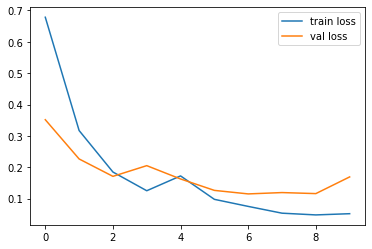

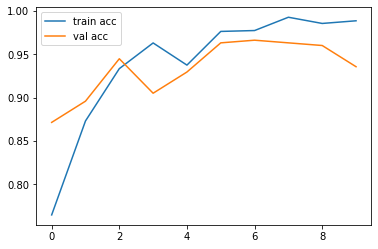

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
cd ./content/drive/MyDrive/Detecting ads using machine learning/Photo Data

[Errno 2] No such file or directory: './content/drive/MyDrive/Detecting ads using machine learning/Photo Data'
/content/drive/MyDrive/Detecting ads using machine learning/Photo Data


In [ ]:
from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

NameError: ignored

In [ ]:
y_pred = model.predict(test_set)

In [ ]:
y_pred

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis = 1)  # try without axis 1 too

In [ ]:
y_pred

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model_vgg19.h5')

In [ ]:
img=image.load_img('/content/drive/MyDrive/Detecting ads using machine learning/Photo Data/train/ads/100.jpg',target_size=(224,224))
img1=image.load_img('/content/drive/MyDrive/Detecting ads using machine learning/Photo Data/test/non ads/105.jpg',target_size=(224,224))

In [ ]:
x=image.img_to_array(img)
x
x1 = image.img_to_array(img1)
x1

array([[[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ...,
        [ 1.,  1.,  1.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       ...,

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ...,
        [ 2.,  2.,  2.],
        [18., 18., 18.],
        [ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ...,
        [ 3.,  3.,  3.],
        [ 3.,  3.,  3.],
        [ 1.,  1.,  1.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ...,
        [ 3.,  3.,  3.],
        [ 3.,  3.,  3.],
        [ 1.,  1.,  1.]]

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape
x1=np.expand_dims(x1,axis=0)
img_data1=preprocess_input(x1)

In [ ]:
print(model.predict(img_data))
print(model.predict(img_data1))

[[1. 0.]]
[[2.8166332e-06 9.9999714e-01]]


In [ ]:
a=np.argmax(model.predict(img_data), axis=1)
a1 = np.argmax(model.predict(img_data1), axis=1)

In [ ]:
a

array([0])

In [ ]:
a1

array([1])

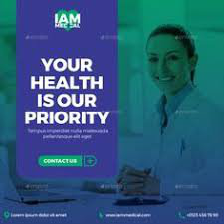

In [ ]:
img

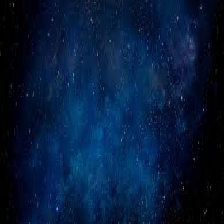

In [ ]:
img1

In [ ]:
if(a==0):
    print("AD")
else:
    print("NONAD")

# Logistic Regression

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
import pickle
from tensorflow.keras.preprocessing import image
%matplotlib inline

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
pwd

'/content/drive/My Drive/Detecting ads using machine learning/Photo Data'

In [ ]:
ls

 AccVal_acc.png   adsclassifymodel.sav   model_vgg19.h5   test/
 ads/             LossVal_loss.png      'non ads'/        train/


In [ ]:
from glob import glob
X_train = []
y_train = []
X_test = []
y_test = []
for i in tqdm(glob('train/ads/*.jpg')):
  # print(i)
  imgs = image.load_img(i, target_size=(224,224,3), grayscale=False)
  imgs = image.img_to_array(imgs)
  imgs = imgs/255
  X_train.append(image.img_to_array(imgs))
  y_train.append(1)
for i in tqdm(glob('train/non ads/*.jpg')):
  # print(i)
  imgs = image.load_img(i, target_size=(224,224,3), grayscale=False)
  imgs = image.img_to_array(imgs)
  imgs = imgs/255
  X_train.append(image.img_to_array(imgs))
  y_train.append(0)

for i in tqdm(glob('test/ads/*.jpg')):
  # print(i)
  imgs = image.load_img(i, target_size=(224,224,3), grayscale=False)
  imgs = image.img_to_array(imgs)
  imgs = imgs/255
  X_test.append(image.img_to_array(imgs))
  y_test.append(1)
for i in tqdm(glob('test/non ads/*.jpg')):
  # print(i)
  imgs = image.load_img(i, target_size=(224,224,3), grayscale=False)
  imgs = image.img_to_array(imgs)
  imgs = imgs/255
  X_test.append(image.img_to_array(imgs))
  y_test.append(0)

X_train = np.array(X_train)
y_train = np.asarray(y_train).astype('int')

X_test = np.array(X_test)
y_test = np.asarray(y_test).astype('int')

100%|██████████| 153/153 [00:01<00:00, 117.98it/s]


In [ ]:
X_train.shape

(978, 224, 224, 3)

In [ ]:
y_train.shape

(978,)

In [ ]:
X_train = X_train.reshape(X_train.shape[0],-1)
print(X_train.shape)
# y = y.reshape(X.shape[0],1)
print(y_train.shape)

X_test = X_test.reshape(X_test.shape[0],-1)
print(X_test.shape)
# y = y.reshape(X.shape[0],1)
print(y_test.shape)

(978, 150528)
(978,)
(327, 150528)
(327,)


In [ ]:
model = LogisticRegression(random_state=0).fit(X_train,y_train)
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


1.0
0.8623853211009175


In [ ]:
model.predict(X_test)

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
filename = 'adsclassifymodel.sav'
pickle.dump(model,open(filename,'wb'))

In [ ]:
loaded_model = pickle.load(open(filename,'rb'))

In [ ]:
###### TESTING ######

imgs = image.load_img('/content/drive/MyDrive/Detecting ads using machine learning/Photo Data/test/ads/11.jpg', target_size=(224,224,3), grayscale=False)
imgs = image.img_to_array(imgs)
imgs = imgs/255
imgs = image.img_to_array(imgs)
imgs.shape

(224, 224, 3)

In [ ]:
imgs=np.expand_dims(imgs,axis=0)
imgs.shape

(1, 224, 224, 3)

In [ ]:
imgs = imgs.reshape(imgs.shape[0],-1)
imgs.shape

(1, 150528)

In [ ]:
loaded_model.predict(imgs)[0]

1

In [ ]:
#########  TESTING 2 #########

imgs = image.load_img('/content/drive/MyDrive/Detecting ads using machine learning/Photo Data/test/non ads/127.jpg', target_size=(224,224,3), grayscale=False)
imgs = image.img_to_array(imgs)
imgs = imgs/255
imgs = image.img_to_array(imgs)
imgs.shape

(224, 224, 3)

In [ ]:
imgs=np.expand_dims(imgs,axis=0)
imgs.shape

(1, 224, 224, 3)

In [ ]:
imgs = imgs.reshape(imgs.shape[0],-1)
imgs.shape

(1, 150528)

In [ ]:
loaded_model.predict(imgs)

array([0])

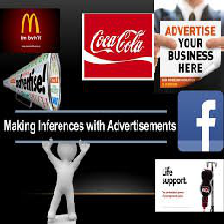

In [ ]:
imgs4 = image.load_img('/content/drive/MyDrive/Detecting ads using machine learning/Photo Data/test/ads/11.jpg', target_size=(224,224,3), grayscale=False)
imgs4